In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(font="monospace", font_scale=1.25, style='white')

In [2]:
df = px.data.iris()
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [3]:
#fill out according to needs 
var_columns_list = ["sepal_length", "sepal_width", "petal_length", "petal_width"]    
sample_col_list = ["species", "species_id"]
number_of_components = 4
plot_title = "PCA plot"
x_axis = 'PC1'
y_axis = 'PC2'
color = 'species'
x_axis_range = [-4, 4] #or None
y_axis_range = [-4, 4] #or None
dtick = 1 
adjust_loadings_arrow_size = 3 

color_discrete_map = {'setosa': '#512C96', 
                      'versicolor': '#3C6F9C', 
                      'virginica': '#DD6892'}
normalize = True
create_loading_plots = True

In [4]:
par_dict = {'var_columns_list': var_columns_list,
            'sample_col_list': sample_col_list,
            'number_of_components': number_of_components,
            'plot_title': plot_title,
            'x_axis': x_axis,
            'y_axis': y_axis,
            'color': color,
            'x_axis_range': x_axis_range, 
            'y_axis_range': y_axis_range,
            'dtick': dtick,
            'adjust_loadings_arrow_size': adjust_loadings_arrow_size,
            'color_discrete_map': color_discrete_map,
            'normalize': normalize,
            'create_loading_plots': create_loading_plots}

In [6]:

# functions
def create_pca_plot(principal_components_df, 
                    pca,
                    par_dict):

    fig = px.scatter(principal_components_df, 
                     x=x_axis, 
                     y=y_axis, 
                     color=principal_components_df[color],
                     color_discrete_map=color_discrete_map,
                     labels={x_axis: x_axis + " ({}%)".format(round((pca.explained_variance_ratio_[int(x_axis.split("PC")[1])-1] * 100),2)),
                             y_axis: y_axis + " ({}%)".format(round((pca.explained_variance_ratio_[int(y_axis.split("PC")[1])-1] * 100),2))},
                     title=plot_title,
                     template="plotly_white")

    #updates the range of x and y axis
    if x_axis_range and y_axis_range:
        fig.update_xaxes(dtick=dtick, range=x_axis_range)
        fig.update_yaxes(dtick=dtick, range=y_axis_range)
    else:
        range_list = []

        range_list.append(principal_components_df[x_axis].max())
        range_list.append(principal_components_df[x_axis].min())

        range_list.append(principal_components_df[y_axis].max())
        range_list.append(principal_components_df[y_axis].min())

        max_number = max(range_list)+10
        min_number = min(range_list)-10
        
        fig.update_xaxes(dtick=dtick, range=[min_number, max_number])
        fig.update_yaxes(dtick=dtick, range=[min_number, max_number])

    #determines if border of plot should be shown
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

    #determines gridlines details
    fig.update_xaxes(showgrid=True, gridwidth=2, gridcolor='#E8E8E8')
    fig.update_yaxes(showgrid=True, gridwidth=2, gridcolor='#E8E8E8')

    #determines how zerolines should be displayed
    fig.update_xaxes(zerolinewidth=2, zerolinecolor='#E8E8E8')
    fig.update_yaxes(zerolinewidth=2, zerolinecolor='#E8E8E8')

    #updates size of feature points in plot
    fig.update_traces(marker=dict(size=10),
                  selector=dict(mode='markers')) 

    #specifies layout details
    fig.update_layout(height=700, 
                      width=800, 
                      showlegend=True, 
                      legend_title_text=color,
                      font=dict(family="Courier New, monospace",
                                size=18,
                                color="black"),
                      title_x=0.45)
    return fig

def add_loadings(loadings_df, 
                 fig, 
                 adjust_loadings_arrow_size):
    
    for i,r in loadings_df.iterrows():
        fig.add_annotation(x= 0, 
                           y= 0, 
                           ax=r[x_axis] * adjust_loadings_arrow_size,  
                           ay=r[y_axis] * adjust_loadings_arrow_size, 
                           xref='x',
                           yref='y',
                           axref='x',
                           ayref='y',
                           text=r['variable'],  
                           showarrow=True,
                           arrowhead=3,
                           arrowsize=1,
                           arrowwidth=1,
                           arrowcolor='red',
                           opacity=0.6,
                           arrowside='start')
    return(fig)
 

def pc_analysis(df, 
                par_dict): 
    
    # subset the variable columns
    X = df.loc[:, par_dict['var_columns_list']]
    # subset the sample column
    y = df.loc[:, par_dict['sample_col_list']]
    
    if par_dict['normalize']:
        X = StandardScaler().fit_transform(X)
        
    pca = PCA(n_components=par_dict['number_of_components'])
    component_names = ["PC" + str(count) for count in range(1, par_dict['number_of_components']+1)]
    
    principal_components = pca.fit_transform(X)

    principal_components_df = pd.DataFrame(data = principal_components, 
                                           columns = component_names)
    principal_components_df = pd.concat([principal_components_df, y], axis = 1)
    
    # create explained variance barplot
    sns.barplot(x=component_names,
                y=(pca.explained_variance_ratio_)*100,
                edgecolor = 'black',
                palette = 'YlGnBu').set(title='Principal Components', ylabel='Percent (%)')
    #plt.savefig("explained_variance_barplot.png", bbox_inches='tight') 
    #plt.savefig("explained_variance_barplot.svg", bbox_inches='tight') 
    plt.show()
    
    #create pca_plot
    fig = create_pca_plot(principal_components_df, 
                          pca,
                          par_dict)
    #fig.write_html("pca_plot.html")
    #fig.write_image("pca_plot.png")
    #fig.write_image("pca_plot.svg")
    fig.show('png')
    
    # create pca plot with loadings
    if create_loading_plots:
        # get PCA loadings dataframe
        loadings_df = pd.DataFrame(data = np.transpose(pca.components_), columns = component_names)    
        X = df.loc[:, par_dict['var_columns_list']]
        loadings_df["variable"] = list(X.columns)
    
        fig_loadings = add_loadings(loadings_df,
                                    fig,
                                    par_dict['adjust_loadings_arrow_size'])
        #fig_loadings.write_html("pca_plot_with_loadings.html")
        #fig_loadings.write_image("pca_plot_with_loadings.png")
        #fig_loadings.write_image("pca_plot_with_loadings.svg")
        fig_loadings.show('png')
        
        # create loadings heatmap 
        plt.figure(figsize=(5,3))
        sns.heatmap(loadings_df.set_index("variable"),
                    cmap='YlGnBu',
                    linewidths=0.7,
                    linecolor="black").set(title='Loadings', ylabel=None)
        #plt.savefig("loadings_heatmap.png", bbox_inches='tight') 
        #plt.savefig("loadings_heatmap.svg", bbox_inches='tight') 
        plt.show()
        
    return("Analysis complete")


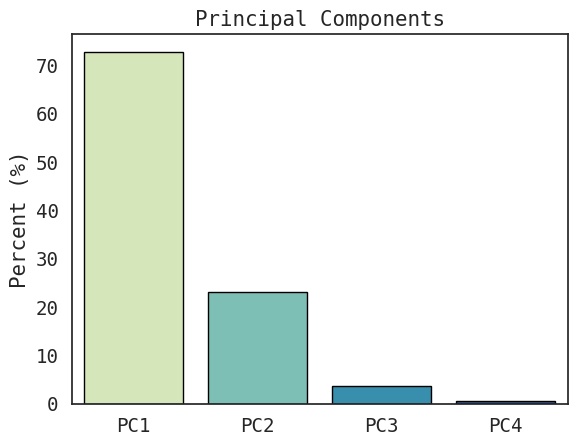

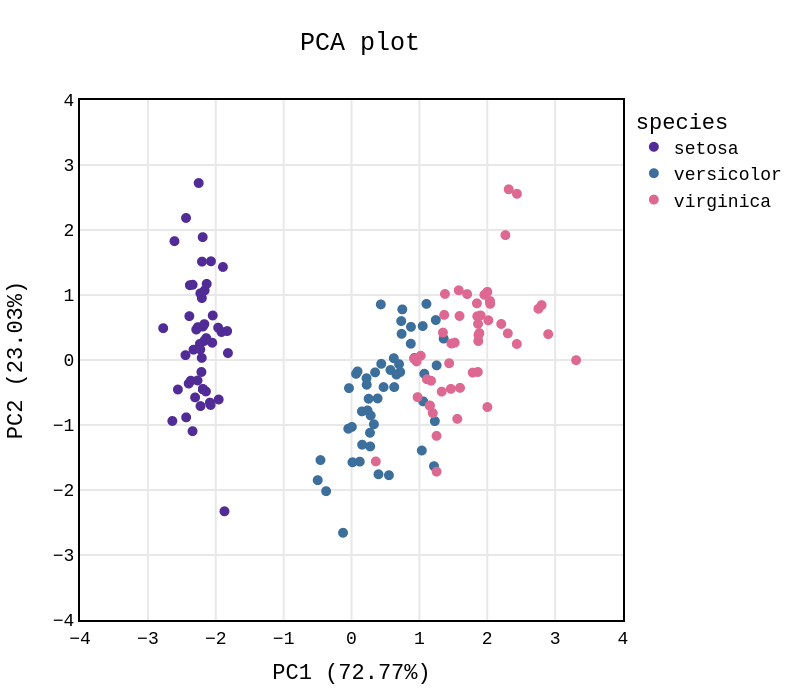

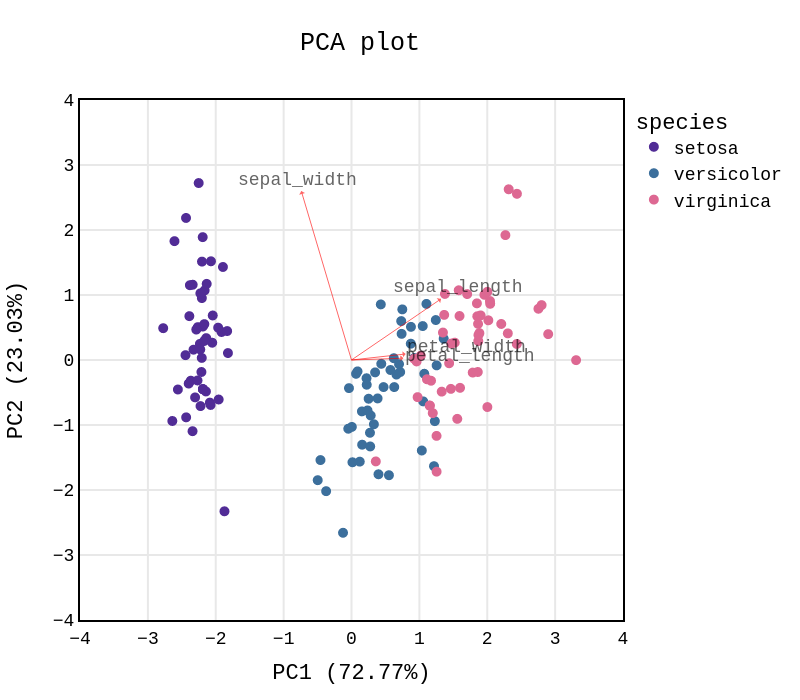

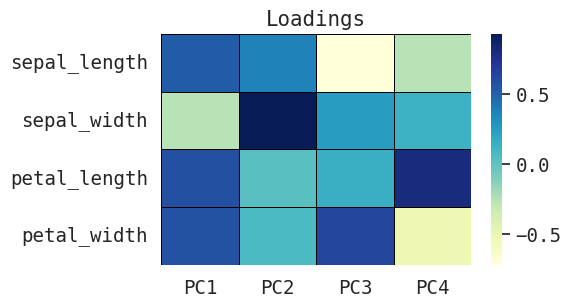

'Analysis complete'

In [7]:
# before starting this cell bring your table in correct format (no index, see iris df as example), log transfrom or transpose etc. accrding to your needs 
# if you want to save figures uncomment corresponding lines in functions
# if you need more details about what is happening checkout notebooks 01 and 02 in this folder they describe Principal Component Analysis in detail
pc_analysis(df, par_dict)